In [ ]:
import tensorflow as tf
import os
import glob
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
IMG_SHAPE = 128
base_dir = "/content/drive/My Drive/train"

In [ ]:
from google.colab import drive
drive.mount('/content/drive', )

Mounted at /content/drive


In [ ]:
classes = ['1.basketball_court','2.beach','3.forest','4.railway','5.tennis_court','6.swimming_pool','7.others']

In [ ]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  print(img_path)
  images = glob.glob(img_path + "/" + '*.jpg')
  #print(images)
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

/content/drive/My Drive/train/1.basketball_court
1.basketball_court: 80 Images


OSError: ignored

In [ ]:
train_dir = '/content/drive/My Drive/train'
val_dir = '/content/drive/My Drive/train'

In [ ]:
image_gen_train = ImageDataGenerator( 
      rescale=1./255)
      
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')

Found 560 images belonging to 7 classes.


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255 )
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 560 images belonging to 7 classes.


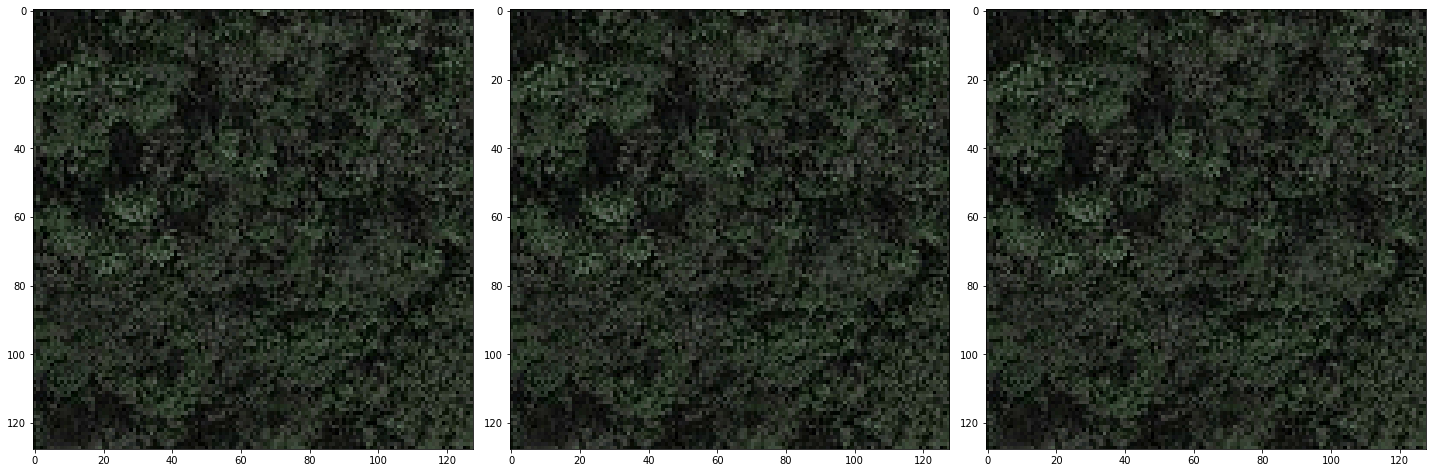

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

img_shape = (128,128,3)
n_classes = 7
l2_reg = 1e-2

In [ ]:
# Initialize model
alexnet = Sequential()

# Layer 1
alexnet.add(Conv2D(32, (3, 3), input_shape=img_shape, padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
alexnet.add(Conv2D(64, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
alexnet.add(Conv2D(128, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
alexnet.add(Conv2D(256, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5
alexnet.add(Conv2D(512, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(512))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
# alexnet.add(Dropout(0.4))

# Layer 7
alexnet.add(Dense(n_classes))
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))

In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
alexnet.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'], )

In [ ]:
alexnet.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
activation_42 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_43 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
activation_43 (Activation)   (None, 64, 64, 64)       

In [ ]:
epochs=200
history = alexnet.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen 
)
alexnet.save_weights("weights.h5")

Epoch 1/200
18/18 [==============================] - 4s 227ms/step - loss: 1.7443 - accuracy: 0.4857 - val_loss: 2.0226 - val_accuracy: 0.1429
Epoch 2/200
18/18 [==============================] - 4s 214ms/step - loss: 1.5952 - accuracy: 0.7179 - val_loss: 2.0219 - val_accuracy: 0.1429
Epoch 3/200
18/18 [==============================] - 4s 211ms/step - loss: 1.5000 - accuracy: 0.8107 - val_loss: 1.8713 - val_accuracy: 0.2821
Epoch 4/200
18/18 [==============================] - 4s 207ms/step - loss: 1.4605 - accuracy: 0.8250 - val_loss: 1.7920 - val_accuracy: 0.3643
Epoch 5/200
18/18 [==============================] - 4s 207ms/step - loss: 1.4325 - accuracy: 0.8250 - val_loss: 1.7780 - val_accuracy: 0.3732
Epoch 6/200
18/18 [==============================] - 4s 206ms/step - loss: 1.3576 - accuracy: 0.8857 - val_loss: 1.7981 - val_accuracy: 0.3536
Epoch 7/200
18/18 [==============================] - 4s 204ms/step - loss: 1.3117 - accuracy: 0.9268 - val_loss: 1.6192 - val_accuracy: 0.5589

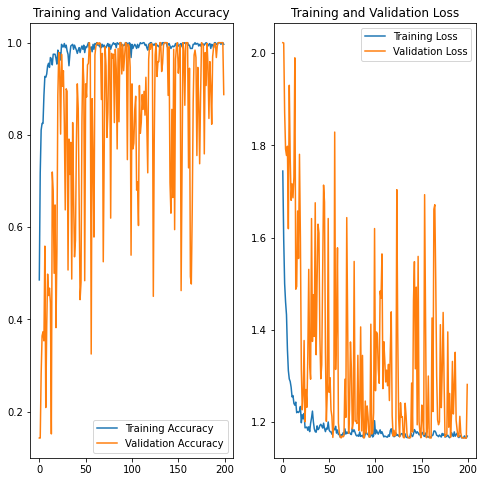

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
"""
epochs = 400, learning rate = default ,l2 = 0, train = 93  , val = 73
epochs = 400, learning rate = default, l2 = 0.01,0.001,0.0001 , train and val = 'poor'
"""

"\nepochs = 400, learning rate = default ,l2 = 0, train = 93  , val = 73\nepochs = 400, learning rate = default, l2 = 0.01,0.001,0.0001 , train and val = 'poor'\n"

In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

count = 0
X = np.zeros((95,128,128,3))
path = '/content/drive/My Drive/test_set'
for filename in os.listdir(path):
  loc = os.path.join(path, str(1001 + count) + ".jpg")
  print(loc)
  file = cv2.imread(loc)
  file = cv2.resize(file,(128,128))
  X[count] = file
  print(count)
  count = count + 1
print(X)

/content/drive/My Drive/test_set/1001.jpg
0
/content/drive/My Drive/test_set/1002.jpg
1
/content/drive/My Drive/test_set/1003.jpg
2
/content/drive/My Drive/test_set/1004.jpg
3
/content/drive/My Drive/test_set/1005.jpg
4
/content/drive/My Drive/test_set/1006.jpg
5
/content/drive/My Drive/test_set/1007.jpg
6
/content/drive/My Drive/test_set/1008.jpg
7
/content/drive/My Drive/test_set/1009.jpg
8
/content/drive/My Drive/test_set/1010.jpg
9
/content/drive/My Drive/test_set/1011.jpg
10
/content/drive/My Drive/test_set/1012.jpg
11
/content/drive/My Drive/test_set/1013.jpg
12
/content/drive/My Drive/test_set/1014.jpg
13
/content/drive/My Drive/test_set/1015.jpg
14
/content/drive/My Drive/test_set/1016.jpg
15
/content/drive/My Drive/test_set/1017.jpg
16
/content/drive/My Drive/test_set/1018.jpg
17
/content/drive/My Drive/test_set/1019.jpg
18
/content/drive/My Drive/test_set/1020.jpg
19
/content/drive/My Drive/test_set/1021.jpg
20
/content/drive/My Drive/test_set/1022.jpg
21
/content/drive/My Dr

In [ ]:
import numpy as np

Y = np.zeros((95))
#model.load_weights('weights.h5')
Y = alexnet.predict_classes(X/255)
print(Y)
print(Y+1)
for i in range(0,95):
  print("{},{}".format(i+1,Y[i]+1))
f = open("190020044.csv","w")
f.write("ImageID,Label\n")
for i in range(0,95):
  f.write(str(1001+i) + "," + str(Y[i]+1) + "\n")
  print(i)
  '''['1.basketball_court','2.beach','3.forest','4.railway','5.tennis_court','6.swimming_pool','7.others']'''

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
10,1
11,1
12,1
13,1
14,1
15,1
16,1
17,1
18,1
19,1
20,1
21,1
22,1
23,1
24,1
25,1
26,1
27,1
28,1
29,1
30,1
31,1
32,1
33,1
34,1
35,1
36,1
37,1
38,1
39,1
40,1
41,1
42,1
43,1
44,1
45,1
46,1
47,1
48,1
49,1
50,1
51,1
52,1
53,1
54,1
55,1
56,1
57,1
58,1
59,1
60,1
61,1
62,1
63,1
64,1
65,1
66,1
67,1
68,1
69,1
70,1
71,1
72,1
73,1
74,1
75,1
76,1
77,1
78,1
79,1
80,1
81,1
82,1
83,1
84,1
85,1
86,1
87,1
88,1
89,1
90,1
91,1
92,1
93,1
94,1
95,1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
